## Assignment 4

### Akshay Santoshi - CS21BTECH11012

### Question 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy import ndimage

In [2]:
image_path = 'nasa_image6.jpg'
color_img = cv2.imread(image_path)

gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

### Question 1.1

In [3]:
def linear_op(I, P=1.5, L=30):
    I = I.astype(np.float32)  
    J1 = P * I                
    J2 = P * I + L            

    # J1 = np.clip(J1, 0, 255).astype(np.uint8)
    # J2 = np.clip(J2, 0, 255).astype(np.uint8)

    return J1, J2

In [4]:
J1, J2 = linear_op(gray_img, P=1.5, L=30)

In [5]:
def plot_histograms(original, result1, result2):
    plt.figure(figsize=(15, 5))

    # Histogram for original
    plt.subplot(1, 3, 1)
    plt.hist(original.ravel(), bins=256, range=(0, 255), color='blue')
    plt.title('Histogram of Original Image (I)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Histogram for J = P * I
    plt.subplot(1, 3, 2)
    plt.hist(result1.ravel(), bins=256, range=(0, 255), color='green')
    plt.title('Histogram of J = P·I (J1)')

    # Histogram for J = P * I + L
    plt.subplot(1, 3, 3)
    plt.hist(result2.ravel(), bins=256, range=(0, 255), color='red')
    plt.title('Histogram of J = P·I + L (J2)')

    plt.tight_layout()
    plt.show()


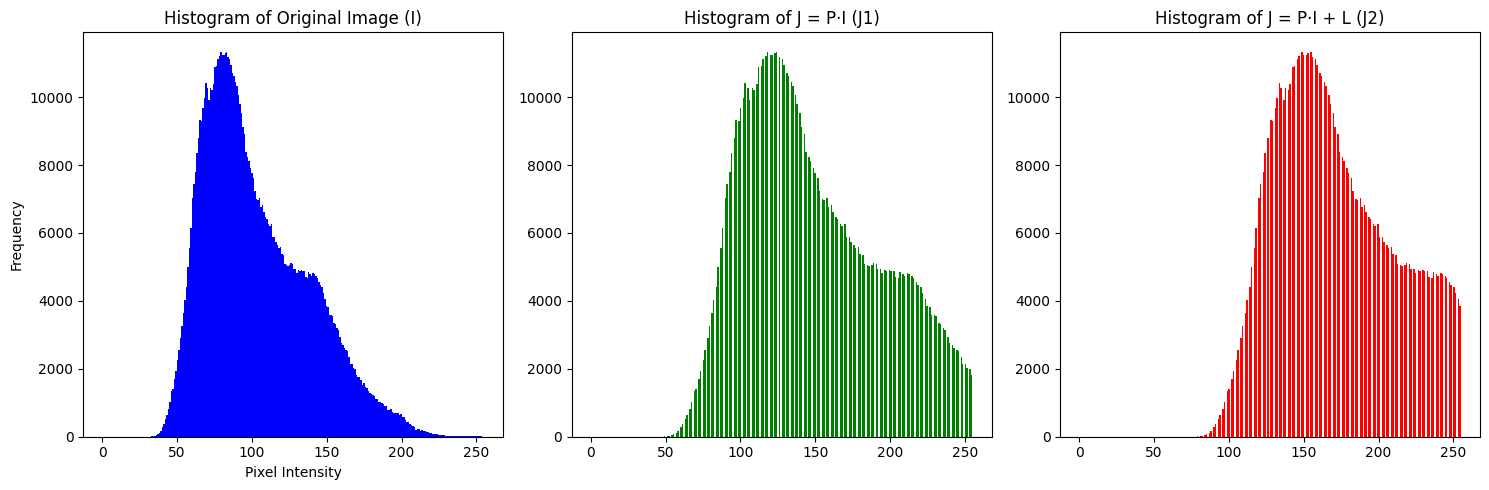

In [6]:
plot_histograms(gray_img, J1, J2)

In [7]:
def show_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

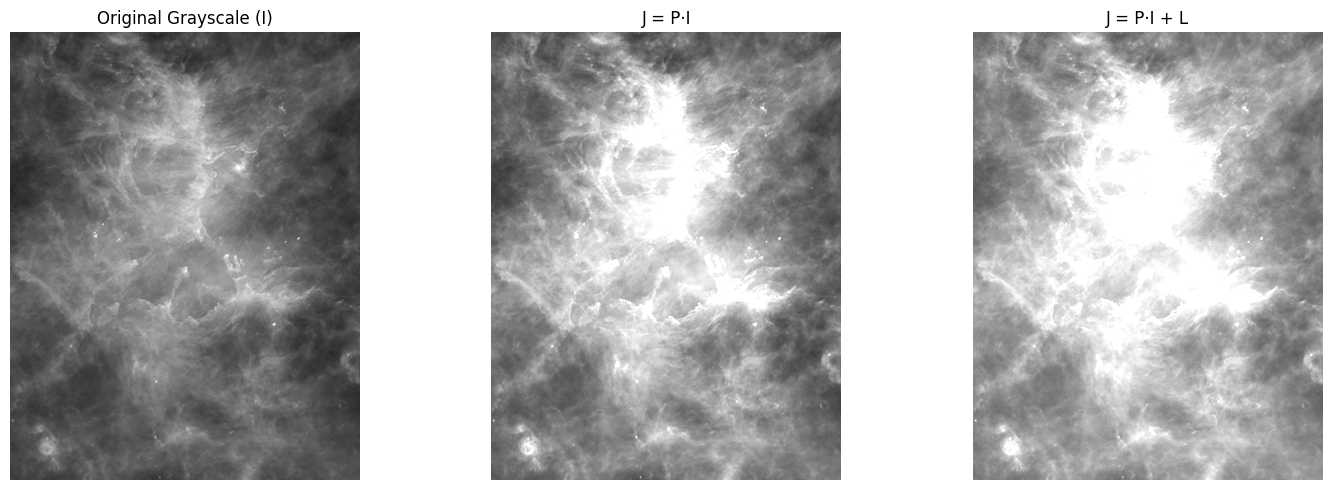

In [8]:
show_images([gray_img, J1, J2], ['Original Grayscale (I)', 'J = P·I', 'J = P·I + L'])

Observations and verifications:
<br>
1. J = P.I: In this case we multiplied all pixel intensities by a constant P=1.5. We observe that the histogram stretched towards the higher end and spread out. The multiplication by P increases brightness and contrast.
2. J = P.I + L: In this case we are also shifting the histogram by L (P=1.5 and L=30). The histogram is further shifted right. Brightness has increased further in addition to contrast.

These histograms verify the expected behavior: scaling increases spread, and adding a constant shifts the histogram to the right. 

### Question 1.2

In [9]:
def fscs(I):
    min_val = np.min(I)
    max_val = np.max(I)
    print("Before FSCS: min =", min_val, "max =", max_val)

    J = (I - min_val) * 255.0 / (max_val - min_val)
    # J = np.clip(J, 0, 255).astype(np.uint8)

    print("After FSCS: min =", J.min(), "max =", J.max())
    return J

In [10]:
def plot_histograms(I, J):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(I.ravel(), bins=256, color='gray')
    plt.title('Histogram Before FSCS')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(J.ravel(), bins=256, color='black')
    plt.title('Histogram After FSCS')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

Before FSCS: min = 27 max = 255
After FSCS: min = 0.0 max = 255.0


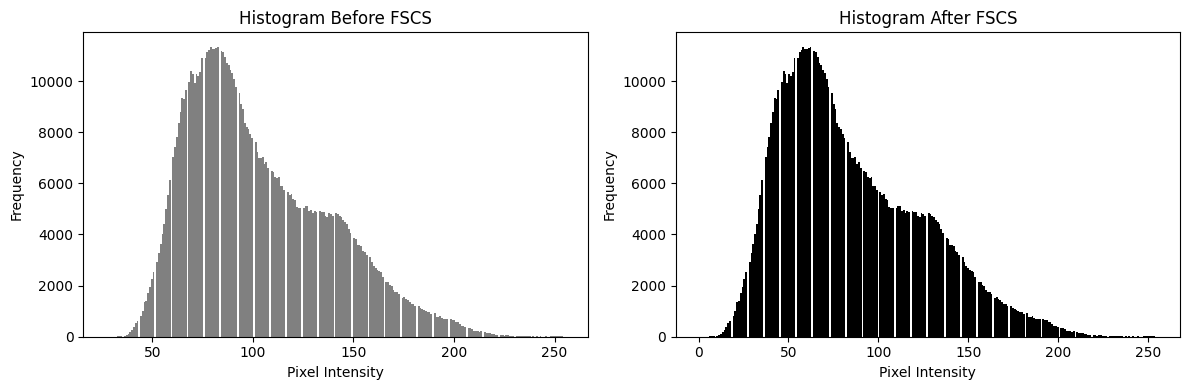

In [11]:
I = gray_img

# Apply FSCS
J = fscs(I)

# Plot histograms
plot_histograms(I, J)

Observations:
<br>
Before FCFS, we observe that histogram applies only part of the [0, 255] range. After FCFS, histogram is stretched across full range. 

### Question 1.3

In [12]:
def log_compression(I):
    I = I.astype(np.float32)  
    c = 255 / np.log(1 + np.max(I))
    print("Scaling constant c:", c)
    
    J = c * np.log(1 + I)
    # J = np.clip(J, 0, 255).astype(np.uint8)
    print("Applied log magnitude compression")
    J_stretched = fscs(J)
    return J_stretched, J 

In [13]:
def plot_log_histograms(I, J_log, J_stretched):
    plt.figure(figsize=(18, 5))

    # Original
    plt.subplot(1, 3, 1)
    plt.hist(I.ravel(), bins=256, color='blue', alpha=0.8)
    plt.title("Histogram of Original Image (I)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # After Log Compression
    plt.subplot(1, 3, 2)
    plt.hist(J_log.ravel(), bins=256, color='green', alpha=0.8)
    plt.title("Histogram After Log Compression")
    plt.xlabel("Pixel Intensity")

    # After Log + FSCS
    plt.subplot(1, 3, 3)
    plt.hist(J_stretched.ravel(), bins=256, color='red', alpha=0.8)
    plt.title("Histogram After Log + FSCS")
    plt.xlabel("Pixel Intensity")

    plt.tight_layout()
    plt.show()

Scaling constant c: 45.98590442833571
Applied log magnitude compression
Before FSCS: min = 153.23444 max = 255.0
After FSCS: min = 0.0 max = 255.0


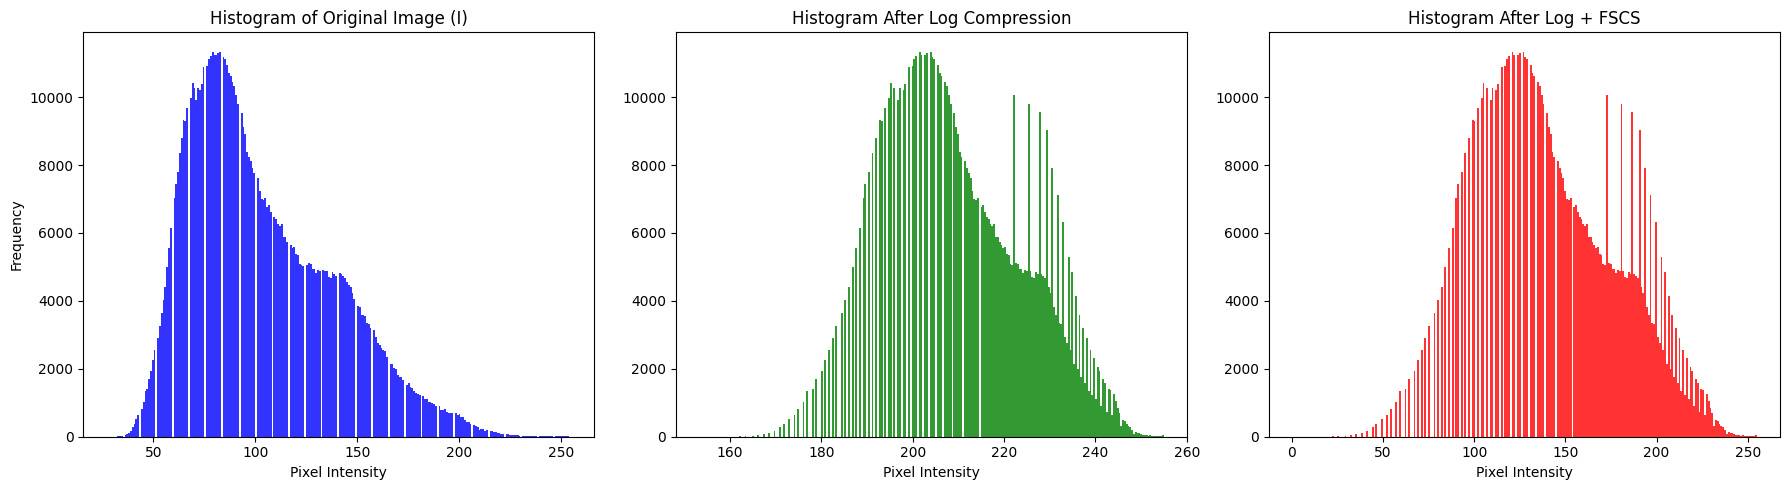

In [14]:
# Apply log compression
J_stretched, J_log = log_compression(I)

# Plot histograms
plot_log_histograms(I, J_log, J_stretched)

Observations:
<br>
Bright regions (which were dominating) are compressed. Darker regions are expanded (they occupy more range). After FCFS, the contrast is improved, using full range [0, 255].

### Question 1.4

In [15]:
def gamma_correction(I, gamma=1.4):
    I = I.astype(np.float32)           
    I_norm = I / 255.0                 
    J = 255 * (I_norm ** gamma)        
    J = np.clip(J, 0, 255).astype(np.uint8)  
    return J

In [16]:
import matplotlib.pyplot as plt

def plot_gamma_histograms(original, corrected):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(original.ravel(), bins=256, color='blue')
    plt.title("Histogram Before Gamma Correction")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(corrected.ravel(), bins=256, color='orange')
    plt.title("Histogram After Gamma Correction (γ=1.4)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

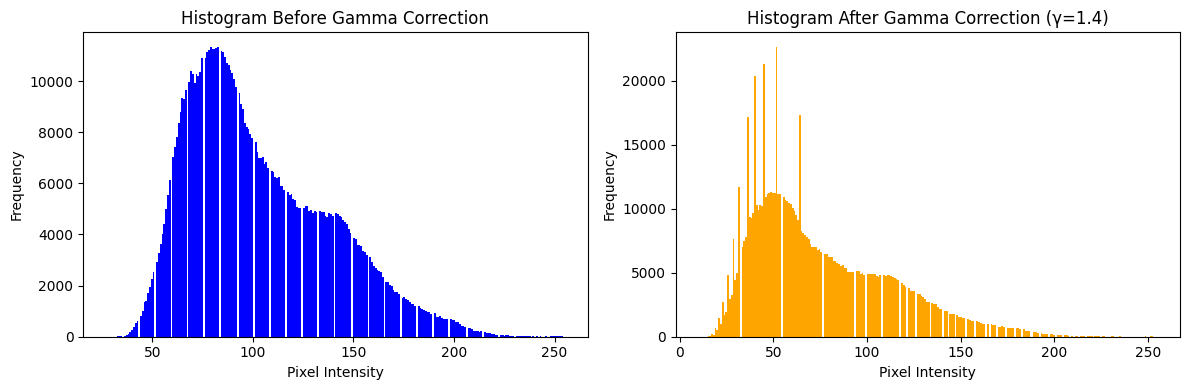

In [17]:
corrected_img = gamma_correction(I, gamma=1.4)
plot_gamma_histograms(I, corrected_img)

Observations:
<br>
The histogram shifts left towards darker values. Bright regions are compressed and dark regions are preserved more.

### Testing our implementation

In [18]:
I_gray = I

# Apply linear operations
J1, J2 = linear_op(I_gray, P=1.5, L=30)

# Apply FSCS
J_fscs = fscs(I_gray)

# Apply log compression + FSCS
J_log, _ = log_compression(I_gray)

# Apply gamma correction
J_gamma = gamma_correction(I_gray, gamma=1.4)

Before FSCS: min = 27 max = 255
After FSCS: min = 0.0 max = 255.0
Scaling constant c: 45.98590442833571
Applied log magnitude compression
Before FSCS: min = 153.23444 max = 255.0
After FSCS: min = 0.0 max = 255.0


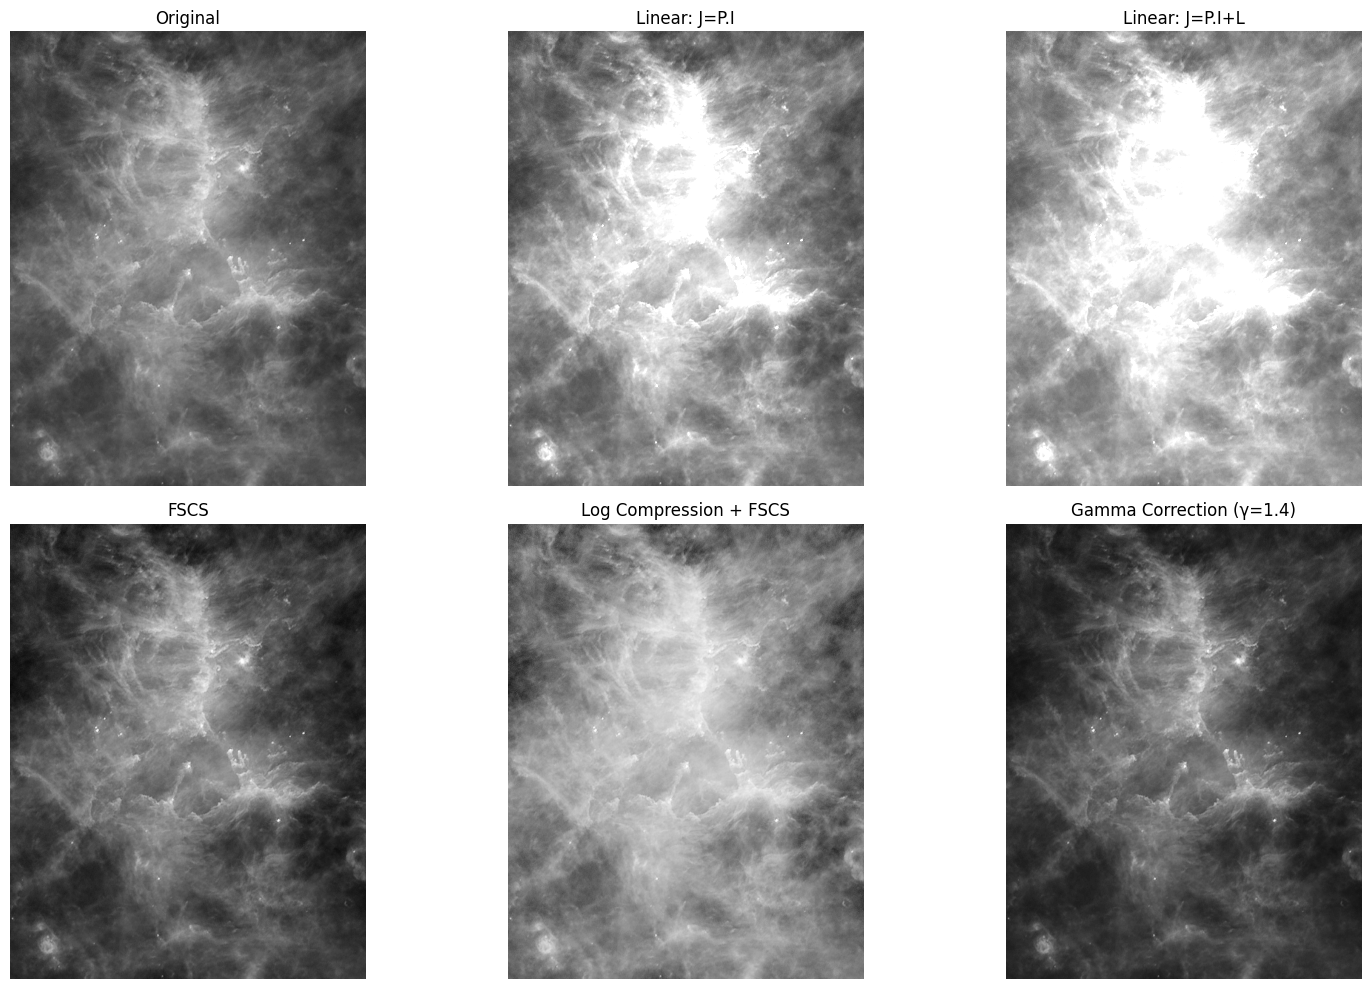

In [19]:
def show_comparison(images, titles):
    plt.figure(figsize=(16, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)  # prevent auto contrast stretch
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

images = [I_gray, J1, J2, J_fscs, J_log, J_gamma]

titles = ["Original", "Linear: J=P.I", "Linear: J=P.I+L", "FSCS", "Log Compression + FSCS", "Gamma Correction (γ=1.4)"]

show_comparison(images, titles)

The original image had low contrast - most of the shades were in the middle, and the darker areas didn't show much detail. 
<br>
When we applied FSCS, it made the image much clearer by spreading out the brightness levels more evenly. This shows that the original image wasn’t using the full range of brightness it could.
<br>
Log compression followed by FSCS worked even better — it helped bring out very faint details without making the bright parts too bright. 
<br>
On the other hand, gamma correction with γ = 1.4 made the image look darker and toned down the bright spots. 
<br>
In short, FSCS and Log + FSCS gave the best results. They made hidden details easier to see and made the image much clearer overall.

### Question 2

In [20]:
img = cv2.imread('mandrill.tiff', cv2.IMREAD_GRAYSCALE)

### Question 2.1

In [21]:
kernels = {
    'Centered': {
        'dx': np.array([[0, 1, 0], [0, 0, 0], [0, -1, 0]]),
        'dy': np.array([[0, 0, 0], [1, 0, -1], [0, 0, 0]])
    },
    'Roberts': {
        'dx': np.array([[1, 0], [0, -1]]),
        'dy': np.array([[0, 1], [-1, 0]])
    },
    'Prewitt': {
        'dx': np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
        'dy': np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    },
    'Sobel': {
        'dx': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
        'dy': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    }
}

In [22]:
def magnitude_l2(dx, dy):
    return np.sqrt(dx**2 + dy**2)

def magnitude_l1(dx, dy):
    return np.abs(dx) + np.abs(dy)

def magnitude_linf(dx, dy):
    return np.maximum(np.abs(dx), np.abs(dy))

In [23]:
def threshold_edges(mag, tau=100):
    return (mag >= tau).astype(np.uint8) * 255

In [24]:
def plot_maps(maps, title):
    plt.figure(figsize=(15, 6))
    for i, (name, img) in enumerate(maps.items()):
        plt.subplot(1, len(maps), i+1)
        plt.imshow(img, cmap='gray')
        plt.title(name)
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

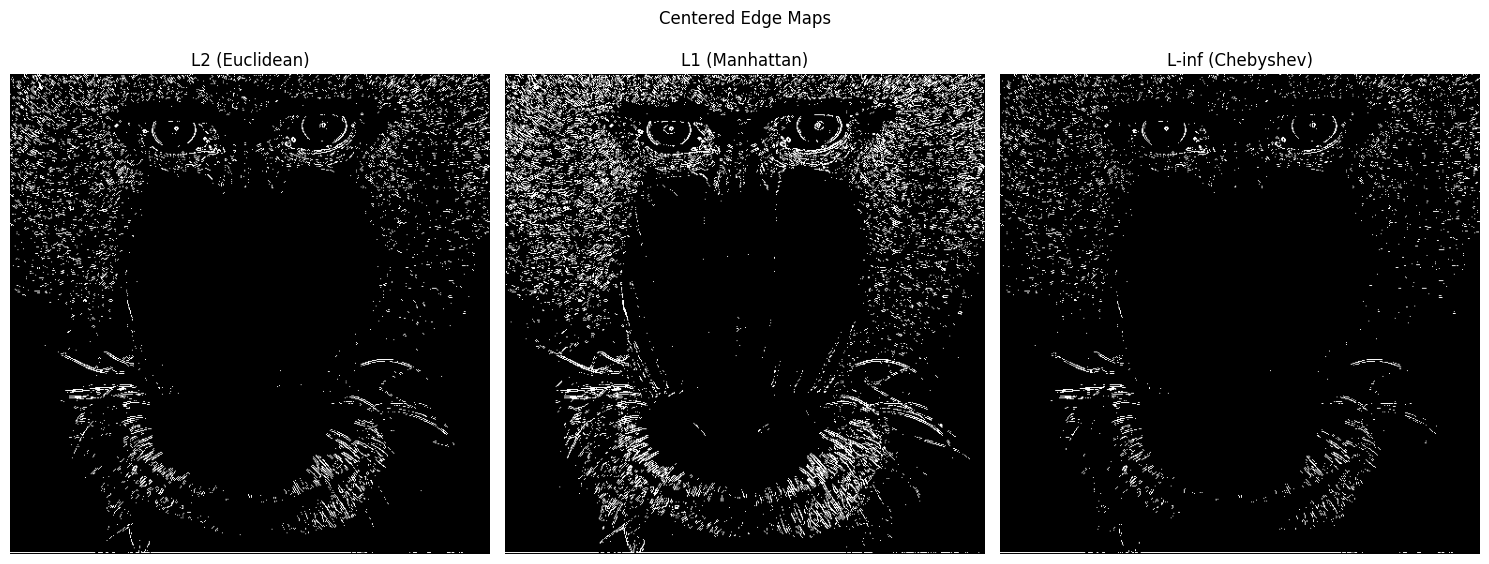

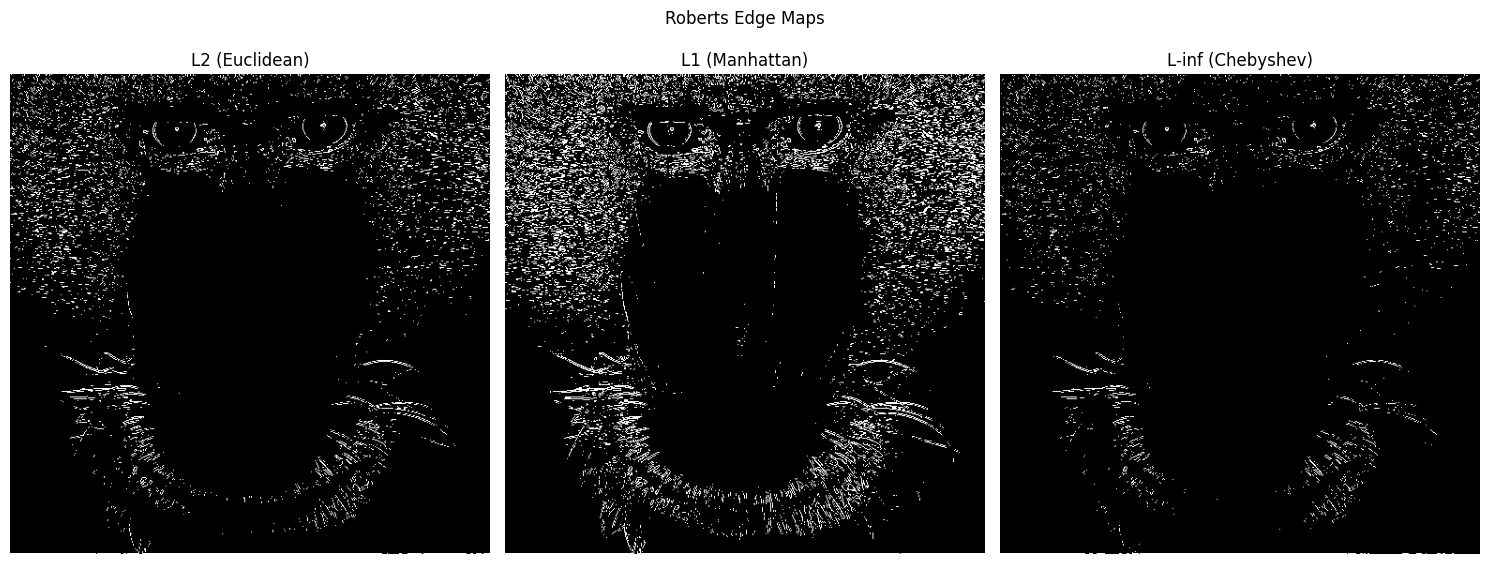

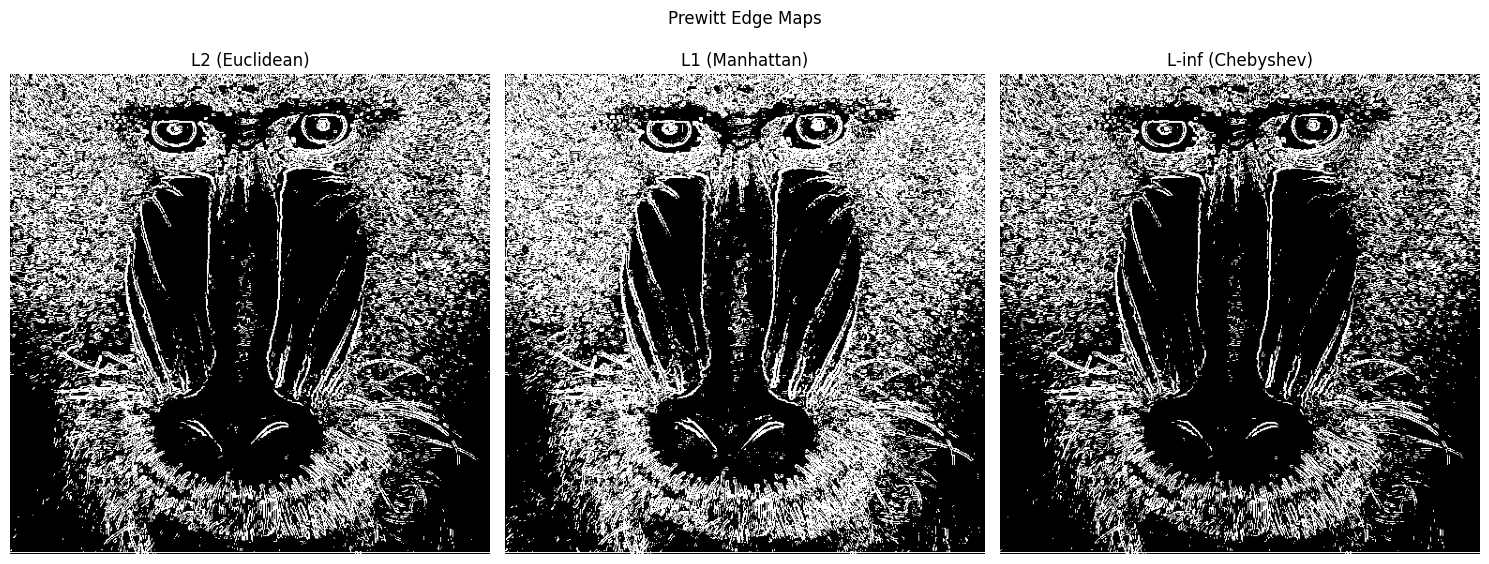

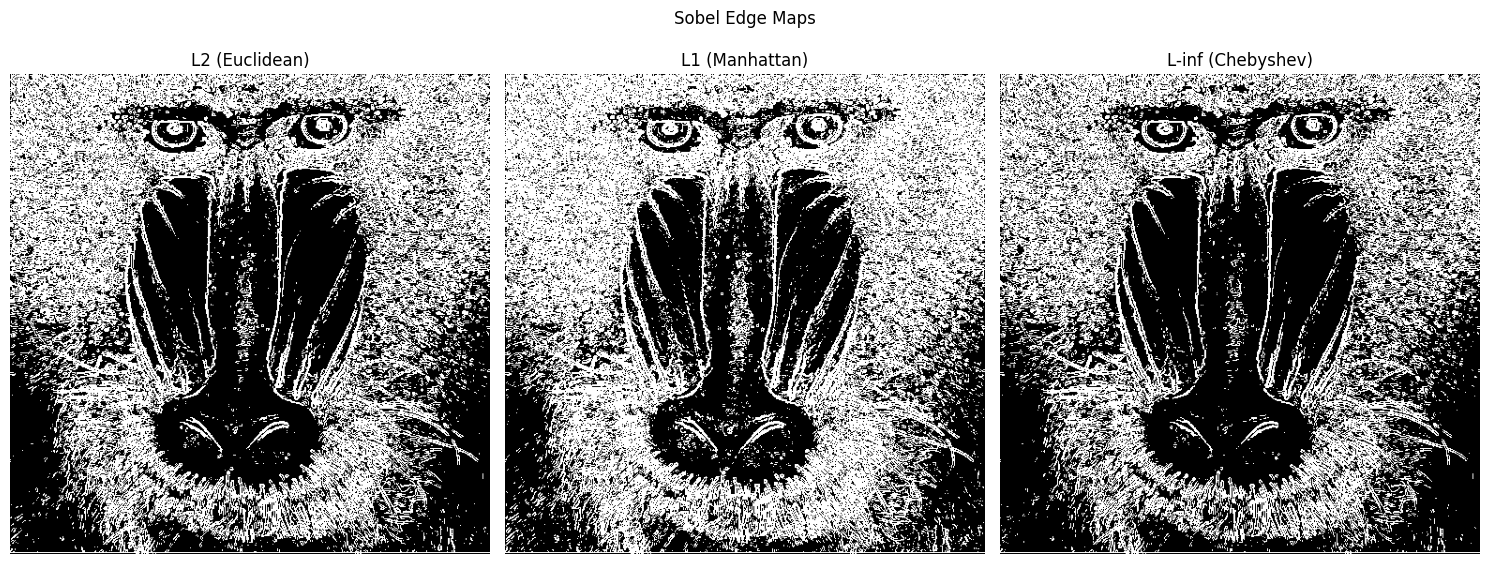

In [25]:
tau = 100  

for name, k in kernels.items():
    border_type = cv2.BORDER_REPLICATE if k['dx'].shape == (2, 2) else cv2.BORDER_DEFAULT
    
    dx = cv2.filter2D(img.astype(np.float32), -1, k['dx'], borderType=border_type)
    dy = cv2.filter2D(img.astype(np.float32), -1, k['dy'], borderType=border_type)

    # Compute all three magnitude maps
    mag_l2 = magnitude_l2(dx, dy)
    mag_l1 = magnitude_l1(dx, dy)
    mag_linf = magnitude_linf(dx, dy)

    # Threshold each
    edge_l2 = threshold_edges(mag_l2, tau)
    edge_l1 = threshold_edges(mag_l1, tau)
    edge_linf = threshold_edges(mag_linf, tau)

    plot_maps({
        'L2 (Euclidean)': edge_l2,
        'L1 (Manhattan)': edge_l1,
        'L-inf (Chebyshev)': edge_linf
    }, f'{name} Edge Maps')

### Question 2.2

In [26]:
image_path = 'mandrill.tiff'
image = cv2.imread(image_path)

if len(image.shape) == 3:  
    image = color.rgb2gray(image)

laplacian_kernel = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

laplacian = ndimage.convolve(image, laplacian_kernel)

In [27]:
def zero_crossing_detector(laplacian):
    edge_map = np.zeros_like(laplacian)
    rows, cols = laplacian.shape
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            neighbors = [
                laplacian[i-1, j],  # Top
                laplacian[i+1, j],  # Bottom
                laplacian[i, j-1],  # Left
                laplacian[i, j+1]   # Right
            ]
            center = laplacian[i, j]
            for neighbor in neighbors:
                if (center > 0 and neighbor < 0) or (center < 0 and neighbor > 0):
                    edge_map[i, j] = 1
                    break
                elif center == 0:
                    if any(n > 0 for n in neighbors) and any(n < 0 for n in neighbors):
                        edge_map[i, j] = 1
                        break
    return edge_map

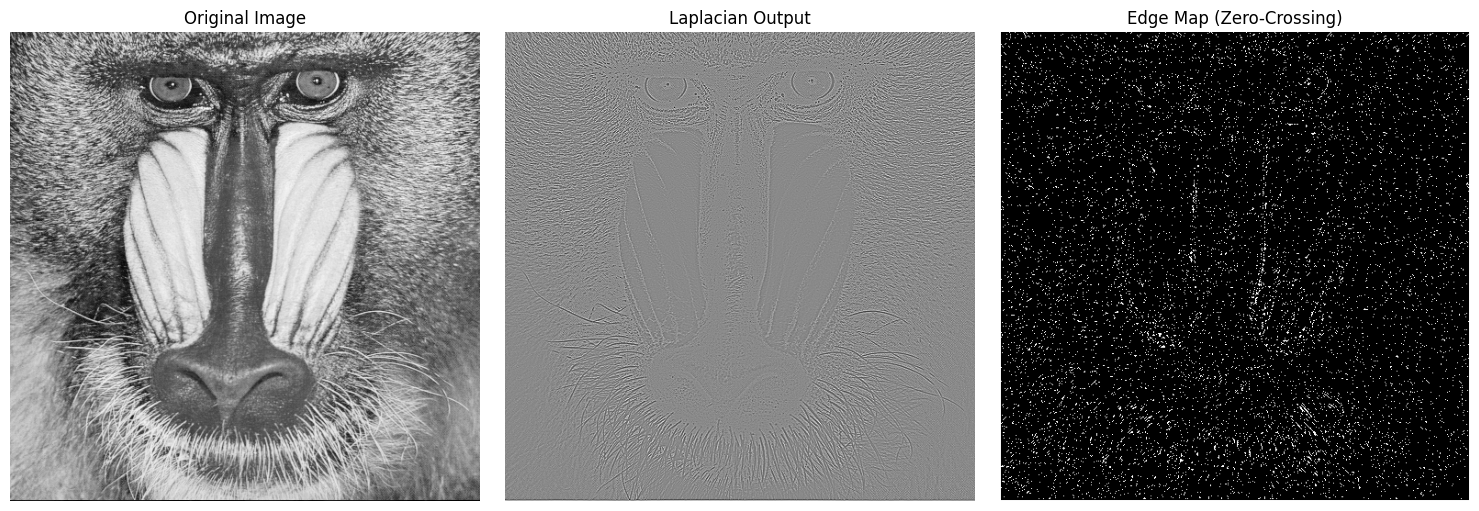

In [28]:
edge_map = zero_crossing_detector(laplacian)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Output')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edge_map, cmap='binary')
plt.title('Edge Map (Zero-Crossing)')
plt.axis('off')

plt.tight_layout()
plt.show()